In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import fourier_analysis, compare_homo_hetero, fourier_instability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import math
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df_1 = pd.read_csv("Data/data_seed4_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")
df_2 = pd.read_csv("Data/data_seed8_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")
df_3 = pd.read_csv("Data/data_seed16_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")
df_4 = pd.read_csv("Data/data_seed32_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")
df_5 = pd.read_csv("Data/data_seed64_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")
df_6 = pd.read_csv("Data/data_seed128_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")
df_7 = pd.read_csv("Data/data_seed256_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")
df_8 = pd.read_csv("Data/data_seed512_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")
df_9 = pd.read_csv("Data/data_seed1024_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv")

df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9], axis = 1)
df

,Seed 4,Seed 8,Seed 16,Seed 32,Seed 64,Seed 128,Seed 256,Seed 512,Seed 1024
0,0.775,0.774,0.774,0.671,0.738,0.749,0.719,0.738,0.701
1,0.688,0.698,0.674,0.543,0.630,0.621,0.597,0.625,0.591
2,0.686,0.691,0.671,0.548,0.627,0.609,0.586,0.622,0.591
3,0.682,0.687,0.676,0.544,0.623,0.608,0.584,0.610,0.580
4,0.675,0.682,0.684,0.535,0.622,0.607,0.592,0.598,0.577
5,0.676,0.676,0.687,0.532,0.621,0.597,0.586,0.599,0.579
6,0.682,0.674,0.689,0.531,0.612,0.595,0.578,0.597,0.573
7,0.675,0.672,0.684,0.542,0.611,0.592,0.581,0.586,0.575
8,0.676,0.672,0.683,0.538,0.610,0.596,0.575,0.582,0.571
9,0.675,0.681,0.683,0.536,0.611,0.597,0.579,0.588,0.575


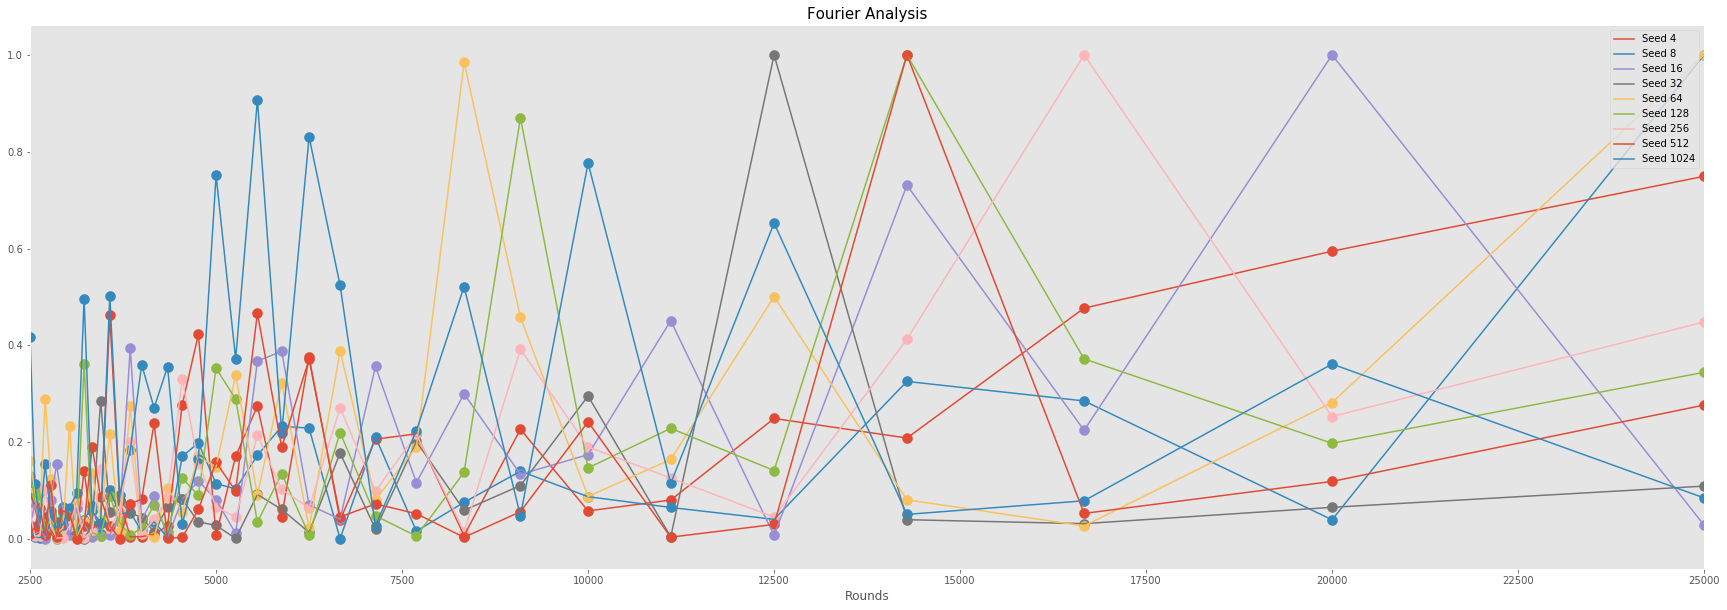

In [3]:
fourier_analysis(df, fig_style='ggplot', x_lim=(2500,25000))

In [4]:
a = fourier_instability([df[column] for column in df], np.arange(4,11))

In [5]:
a.sort_values(by=['N'])

,Seed,N,sum_of_peaks
0,Seed 4,4,19.0
28,Seed 64,4,24.0
35,Seed 128,4,21.0
21,Seed 32,4,8.0
56,Seed 1024,4,42.0
7,Seed 8,4,8.0
42,Seed 256,4,11.0
14,Seed 16,4,15.0
49,Seed 512,4,8.0
36,Seed 128,5,21.0


In [6]:
a.sort_values(by=['N'])

,Seed,N,sum_of_peaks
0,Seed 4,4,19.0
28,Seed 64,4,24.0
35,Seed 128,4,21.0
21,Seed 32,4,8.0
56,Seed 1024,4,42.0
7,Seed 8,4,8.0
42,Seed 256,4,11.0
14,Seed 16,4,15.0
49,Seed 512,4,8.0
36,Seed 128,5,21.0


In [7]:
a.to_csv("fourier_instability_COMPLETEHETERO.csv", index = False)